In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
import folium

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df = pd.read_csv('datasets-checkpoint.csv', encoding= 'unicode_escape')
#to avoid encoding error i use 'unicode_escape'

In [ ]:
df.shape

(9551, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ï»¿Restaurant ID      9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
data= pd.read_csv('datasets-checkpoint.csv')
Cuisines_counts = data['Cuisines'].value_counts()

# Get the top three most common cuisines
top_three_Cuisines = Cuisines_counts.head(3)

print(top_three_Cuisines)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


In [1]:
# percentages of common cuisines
df = pd.read_csv('datasets-checkpoint.csv')

top_Cuisines = ['North Indian' , 'North Indian, Chinese' , 'Chinese']

cuisine_percentages = {}

for Cuisine in top_Cuisines:
    count = df[df['Cuisines'] == 'Cuisines']['Restaurant Name'].count()
    percentage = (count / len(df)) * 100
    cuisine_percentages['Cuisines'] = percentage

print(cuisine_percentages)

NameError: name 'pd' is not defined

In [ ]:
#city with higher number of restaurants
city_restaurant_count = data['City'].value_counts()

city_with_most_restaurants = city_restaurant_count.idxmax()
highest_count = city_restaurant_count.max()

print(f"The city with the most restaurants is {city_with_most_restaurants} with {highest_count} restaurants.")

The city with the most restaurants is New Delhi with 5473 restaurants.


In [ ]:
# Calculate average rating for each city
df = pd.read_csv('datasets-checkpoint.csv')

city_groups = df.groupby('City')


city_avg_ratings = city_groups['Aggregate rating'].mean()

print(city_avg_ratings)

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [ ]:
#city with highest average rating
data = pd.read_csv('datasets-checkpoint.csv')

grouped_data = data.groupby('City')

average_ratings = grouped_data['Aggregate rating'].mean()

city_with_highest_rating = average_ratings.idxmax()

print(f"The city with the highest average rating is: {city_with_highest_rating}")

The city with the highest average rating is: Inner City


In [2]:
# distribution of price range among the restaurants
price_ranges = ['1','2','3','4']

price_counts = {}
for price in price_ranges:
    if price in price_counts:
        price_counts[price] += 1
    else:
        price_counts[price] = 1


unique_prices = list(price_counts.keys())
count_of_each_price = list(price_counts.values())

plt.figure(figsize=(8, 6))
plt.bar(unique_prices, count_of_each_price, color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.show()

NameError: name 'plt' is not defined

In [ ]:
#percentage of restaurants in price range category
data = pd.read_csv('datasets-checkpoint.csv')

df = pd.DataFrame(data)

price_range_counts = df['Price range'].value_counts()

total_restaurants = len(df)

percentages = (price_range_counts / total_restaurants) * 100

print(percentages)

Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [ ]:
# Count the number of restaurants offering online delivery
data = pd.read_csv('datasets-checkpoint.csv')

total_restaurants = len(data)
online_delivery_restaurants = len(data[data['Has Online delivery'] == 1])
percentage_online_delivery = (online_delivery_restaurants / total_restaurants) * 100

print(f"Percentage of restaurants offering online delivery: {percentage_online_delivery:.2f}%")

Percentage of restaurants offering online delivery: 0.00%


In [ ]:
#determine most common rating range
data = pd.read_csv('datasets-checkpoint.csv')

df = pd.DataFrame(data)

with_delivery = df[df['Has Online delivery'] == True]
without_delivery = df[df['Has Online delivery'] == False]

avg_rating_with_delivery = with_delivery['Aggregate rating'].mean()
avg_rating_without_delivery = without_delivery['Aggregate rating'].mean()

t_stat, p_value = stats.ttest_ind(with_delivery['Aggregate rating'], without_delivery['Aggregate rating'])

print(f'Average rating with online delivery: {avg_rating_with_delivery}')
print(f'Average rating without online delivery: {avg_rating_without_delivery}')
print(f'P-value from t-test: {p_value}')

if p_value < 0.05:  
    print('There is a statistically significant difference in ratings between the two groups.')
else:
    print('There is no statistically significant difference in ratings between the two groups.')

Average rating with online delivery: nan
Average rating without online delivery: nan
P-value from t-test: nan
There is no statistically significant difference in ratings between the two groups.


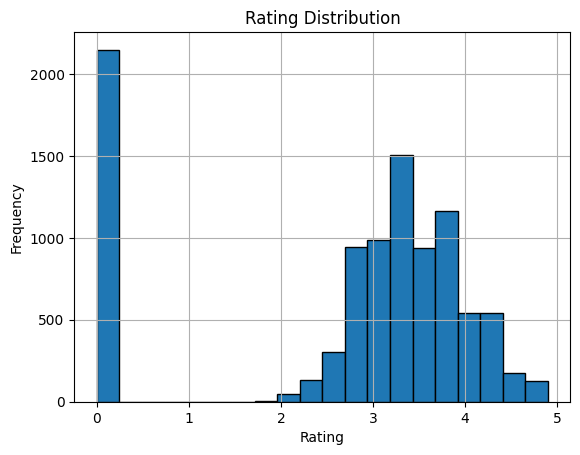

The most common rating is: 0.0


In [ ]:
#find the most common rating
data = pd.read_csv('datasets-checkpoint.csv')

ratings = data['Aggregate rating']
plt.hist(ratings, bins=20, edgecolor='k') 
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Distribution')
plt.grid(True)
plt.show()
most_common_rating = ratings.mode().iloc[0]

print(f'The most common rating is: {most_common_rating}')

In [ ]:
data = pd.read_csv('datasets-checkpoint.csv')

votes_column = data['Votes']

total_votes = votes_column.value_counts()

total_restaurants = len(data)


average_votes = total_votes / total_restaurants

# Print the average number of votes
print("Total Votes:", total_votes)
print("Total Restaurants:", total_restaurants)
print("Average Votes per Restaurant:", average_votes)

Total Votes: Votes
0      1094
1       483
2       327
3       244
4       207
       ... 
615       1
538       1
823       1
650       1
901       1
Name: count, Length: 1012, dtype: int64
Total Restaurants: 9551
Average Votes per Restaurant: Votes
0      0.114543
1      0.050571
2      0.034237
3      0.025547
4      0.021673
         ...   
615    0.000105
538    0.000105
823    0.000105
650    0.000105
901    0.000105
Name: count, Length: 1012, dtype: float64


In [ ]:
# most common combinations of cuisines 
data = pd.read_csv('datasets-checkpoint.csv')

cuisine_counts = data['Cuisines'].value_counts()
most_common_combination = (cuisine_counts.index[0], cuisine_counts.index[1])

print(f'the most common combination of cuisines is {most_common_combination} ')

the most common combination of cuisines is ('North Indian', 'North Indian, Chinese') 


In [ ]:
# cuisine combinations having higher ratings
data = pd.read_csv('datasets-checkpoint.csv')

encoder = OneHotEncoder(sparse=False)
cuisine_combinations = encoder.fit_transform(data[['North Indian', 'North Indian, Chinese']])
X = cuisine_combinations
y = data['Aggregate rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

feature_importance = model.feature_importances_

NameError: name 'OneHotEncoder' is not defined

In [ ]:
# Create a map using longitude and latitude
m = folium.Map(location=[latitude_center, longitude_center], zoom_start=12)

data = pd.read_csv('datasets-checkpoint.csv')

for restaurant in data:
    lat, lon = restaurant['Latitude'], restaurant['Longitude']

    folium.Marker([lat, lon], popup=restaurant['Restaurant Name']).add_to(m)

m.save('restaurant_map.html')

NameError: name 'folium' is not defined

In [ ]:
# clusters of restaurants in specific areas
data = pd.read_csv('datasets-checkpoint.csv')


X = data[['Latitude', 'Longitude']]

k = 5


kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

data['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='rainbow', marker='.')
plt.title('Restaurant Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    print(f'Cluster {i+1} Center: Latitude {center[0]}, Longitude {center[1]}')

cluster_stats = data.groupby('cluster').agg({
    'rating': 'mean',
    'price_range': 'mean',
})
print(cluster_stats)

NameError: name 'KMeans' is not defined

In [ ]:
# if there are any restaurant chains
data = pd.read_csv('datasets-checkpoint.csv')
restaurant_keywords = ['restaurant', 'cafe', 'bistro', 'diner', 'eatery', 'grill']
restaurant_count = {}

for index, row in data.iterrows():
    name = row['Restaurant Name'].lower()
    for keyword in restaurant_keywords:
        if keyword in name:
            restaurant_count[name] = restaurant_count.get(name, 0) + 1

potential_chains = {name: count for name, count in restaurant_count.items() if count > 1}

print("Potential Restaurant Chains:")
for name, count in potential_chains.items():
    print(f"{name}: {count} occurrences")

Potential Restaurant Chains:
chili's grill & bar: 2 occurrences
the cafe: 2 occurrences
huhot mongolian grill: 3 occurrences
ceviche tapas bar & restaurant: 2 occurrences
1918 bistro & grill: 2 occurrences
anchorage cafe restaurant wine bar: 2 occurrences
punjab grill: 5 occurrences
farzi cafe: 6 occurrences
hard rock cafe: 3 occurrences
blue -  rooftop cafe restaurant bistro: 3 occurrences
bhoj restaurant: 2 occurrences
manohar dairy and restaurant: 2 occurrences
pirates of grill: 5 occurrences
burgrill: 2 occurrences
24 plus cafe & restaurant: 2 occurrences
y cafe & restaurant: 2 occurrences
punjab restaurant: 3 occurrences
cafe coffee day: 83 occurrences
ashoka restaurant: 2 occurrences
amici cafe: 3 occurrences
olive bistro: 2 occurrences
cafe delhi heights: 3 occurrences
sonya bakery cafe: 2 occurrences
drifters cafe: 2 occurrences
ammu's south indian restaurant: 2 occurrences
street foods by punjab grill: 3 occurrences
bikaner sweets & restaurant: 6 occurrences
indochi cafe & res

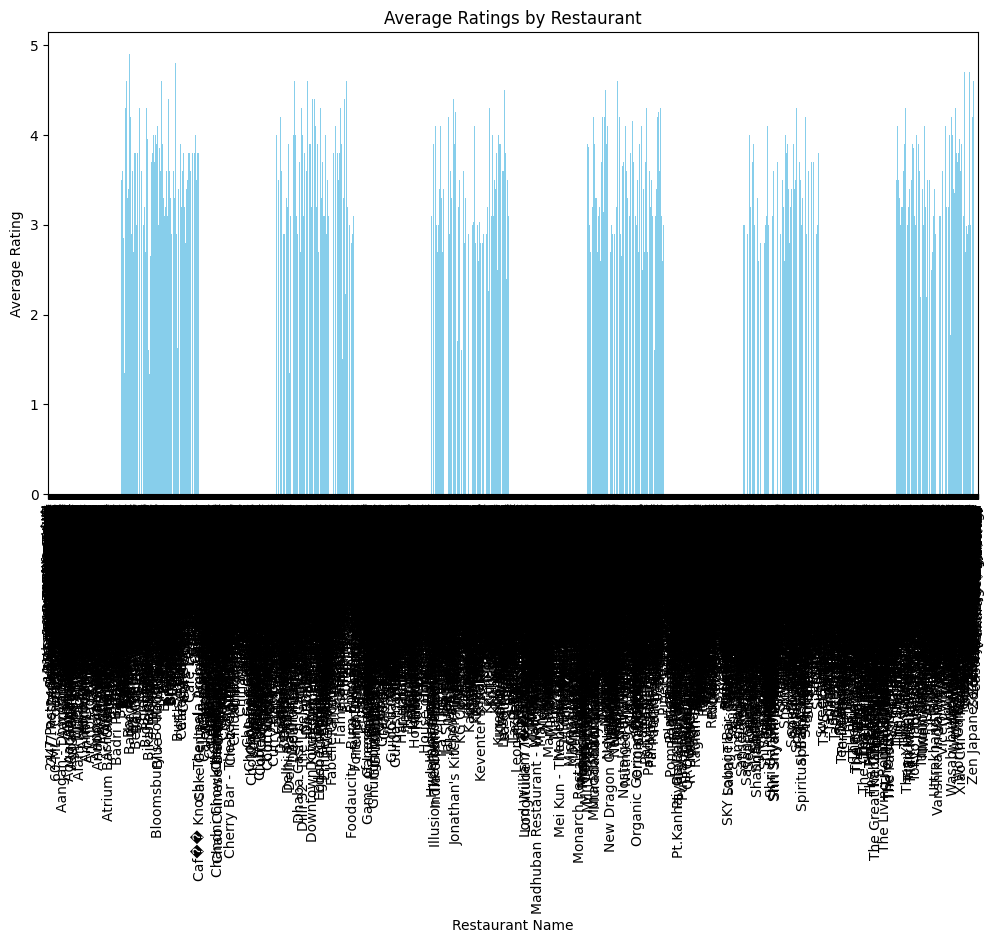

In [ ]:
# ratings and popularity of different restaurant chains
data = pd.read_csv('datasets-checkpoint.csv')

avg_ratings = grouped_data['Aggregate rating'].mean()
popularity = grouped_data['Votes'].mean()

plt.figure(figsize=(12, 6))
avg_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Ratings by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()